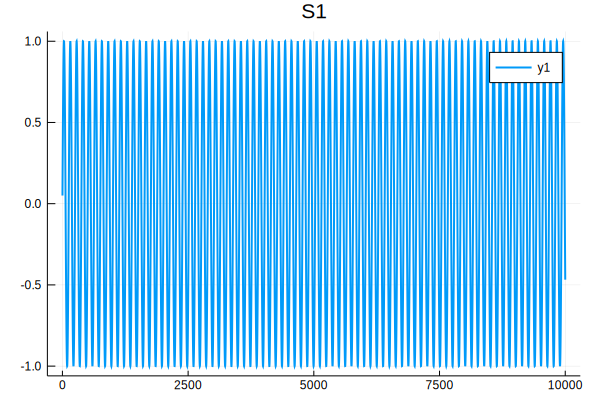

In [7]:
#using Pkg
#Pkg.add("Plots")

using Plots

s1 = sin.((1:10000)./20)
plot(s1, linewidth=2, title = "S1")

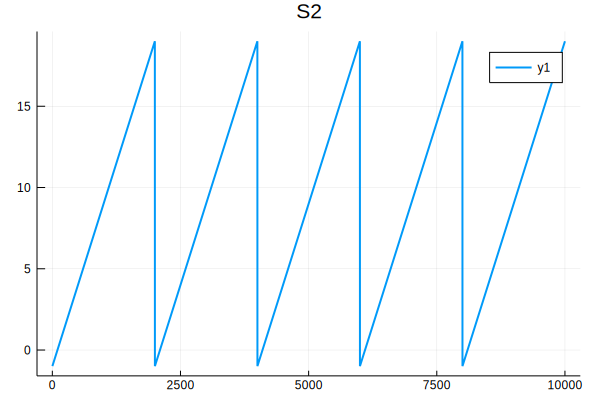

In [8]:
s2 = vec(repeat(((1:2000).-100)/100, 5))
plot(s2,linewidth=2,title="S2")

In [3]:
#mixing matrix
A = [0.291 -0.5439 ; 0.6557 0.5572]
S = hcat(s1,s2)
X = S * A

10000×2 Array{Float64,2}:
 -0.634599  -0.578812
 -0.613534  -0.600355
 -0.592543  -0.621763
 -0.571659  -0.642968
 -0.55092   -0.663903
 -0.530362  -0.684501
 -0.510018  -0.704698
 -0.489923  -0.724429
 -0.470112  -0.74363 
 -0.450617  -0.76224 
 -0.431471  -0.780198
 -0.412705  -0.797445
 -0.39435   -0.813925
  ⋮                  
 12.4046    10.4911  
 12.3966    10.5239  
 12.3886    10.5566  
 12.3806    10.5894  
 12.3727    10.622   
 12.3649    10.6544  
 12.3573    10.6865  
 12.3498    10.7184  
 12.3425    10.7498  
 12.3354    10.7808  
 12.3286    10.8113  
 12.3222    10.8412  

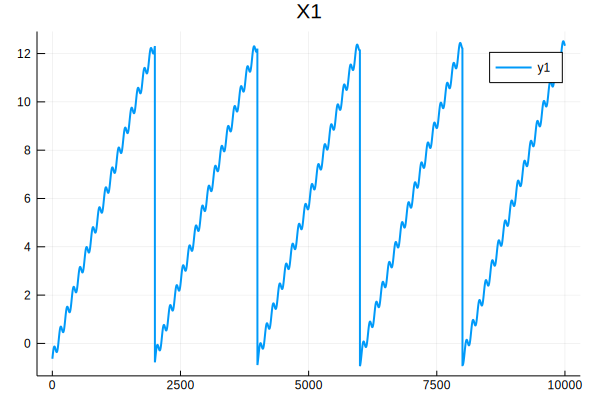

In [4]:
plot(X[:,1], linewidth=2, title = "X1")

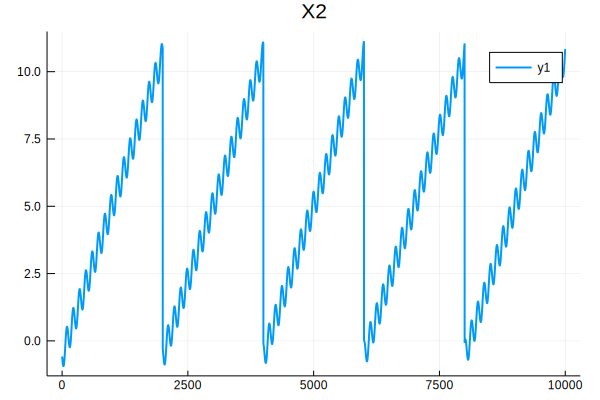

In [5]:
plot(X[:,2], linewidth=2, title = "X2")

In [6]:
include("fastICA.jl")
W = fastICA.whiten(X)
X1 =  X * W'

#direct call to deflation function to pass weights
#a = fastICA.fast_ica_def(200,2,Array(X1'),0.0001,iniwei, 1.)
a = fastICA.fast_ica(100,2,Array(X1'),0.0001,1.)
K = a * W
S = K * X'

Random matrix = [-1.32187 0.155801; -0.808771 -1.16612]
Component n 1
iter = 1
[-1.44375, 0.0731612]
Tolerance change for iter 1 = 0.0037826365416453456
iter = 2
[-1.44662, 0.0438977]
Tolerance change for iter 2 = 3.0178115562051744e-10
Component n 2
iter = 1
[-0.0177505, -0.695906]
Tolerance change for iter 1 = 0.0
retW = [-0.99954 0.0303368; -0.0303368 -0.99954]


2×10000 Array{Float64,2}:
 -0.170653   -0.168104  -0.165559  -0.16302   …  3.28122   3.2822    3.2832  
 -0.0710915  -0.141616  -0.211788  -0.281432     0.541022  0.605842  0.669165

In [ ]:
plot(S[1,:,],linewidth=2, title = "S'1")

In [ ]:
plot(S[2,:,],linewidth=2, title = "S'2")

In [ ]:
iter = 1000
t = zeros(1000)
for i = 1:iter
    t[i] = @elapsed fastICA.fast_ica(100,2,Array(X1'),0.0001,1.)
end

In [ ]:
mean(t)